# Needed packages

In [1]:
import pickle
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np
import pandas as pd
from scipy.stats import chi2

from radardetseval.visualization.plot_polyline import plot_polyline, plot_polyline_range_rates
from radardetseval.visualization.plot_sensor import plot_sensor
from radardetseval.visualization.plot_point import plot_point
from radardetseval.visualization.plot_detection import plot_detection_scs
from radardetseval.visualization.utilities import publish_reduced_labels
from radardetseval.utilities.ecdf import ecdf



Bad key "text.kerning_factor" on line 4 in
c:\users\lz7c3c\wkspaces\aspe0000_00_common\sandbox\radardetectionsevaluation\.venv_pe\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# Load data

In [5]:
data_path = r'private\sim_line_middle_and_end_out_vel_4.pickle'
with open(data_path, 'rb') as handle:
    data = pickle.load(handle)

# Ground truth data summary

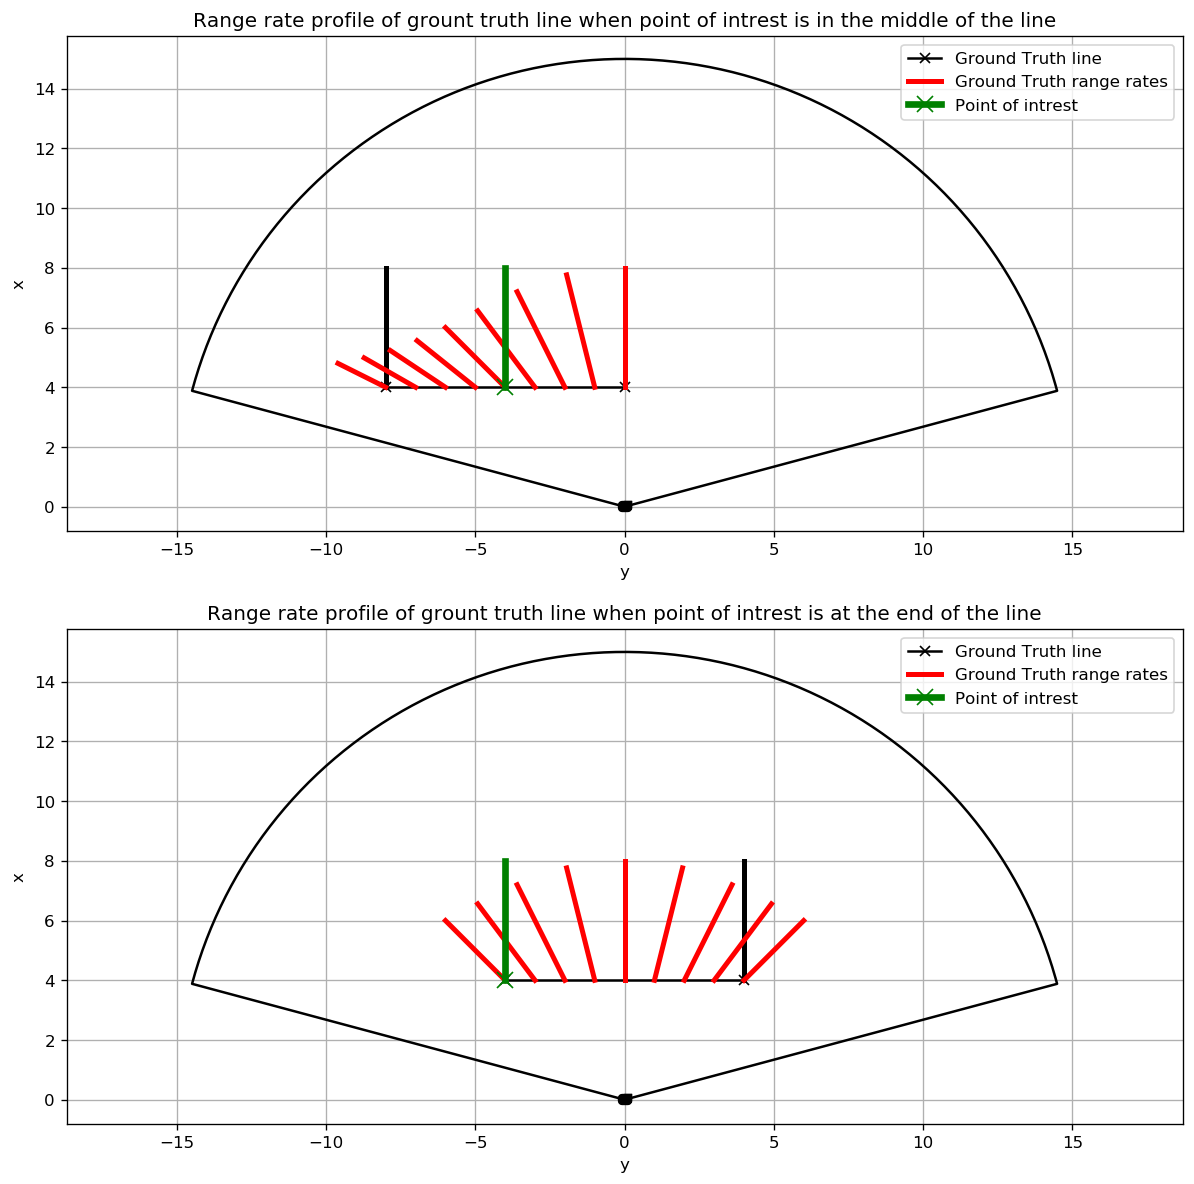

In [6]:
def plot_summary(ax, gt_polyline, vertex_id_of_intrest, title_str):
    plot_sensor(ax, azimuth=np.deg2rad(75.0), max_range=15.0)
    plot_polyline(ax, gt_polyline, color='k', label = 'Ground Truth line')
    
    vertex_ids = gt_polyline.signals['vertex_id'].values
    point_df = gt_polyline.interpolate_polygon(np.array([vertex_id_of_intrest]), vertex_ids, gt_polyline.signals)
        
    gt_polyline.signals = gt_polyline.discretize_single_polygon(gt_polyline.signals, 1.0)
    plot_polyline_range_rates(ax, gt_polyline, label = 'Ground Truth range rates')
    plot_point(ax, point_df.x, point_df.y, point_df.vx, point_df.vy, 
               color='g', markersize=10, linewidth=4, label = 'Point of intrest')
    
    ax.set_title(title_str)
    ax.set_xlabel('y')
    ax.set_ylabel('x')
    publish_reduced_labels(ax)
    ax.axis('equal')
    ax.grid()

fig1=plt.figure(figsize=(12, 12), dpi= 120, facecolor='w', edgecolor='k')
title_prefix = 'Range rate profile of grount truth line '

ax1 = plt.subplot(2, 1, 1)
plot_summary(ax1, deepcopy(data['gt_polyline_middle']), 0.5, 
             title_prefix + 'when point of intrest is in the middle of the line')

ax1 = plt.subplot(2, 1, 2)
plot_summary(ax1, deepcopy(data['gt_polyline_end']), 0.0, 
             title_prefix + 'when point of intrest is at the end of the line')

# Data examples

In [7]:
sim_out = deepcopy(data['sim_out_end_df'])
valid_df = sim_out.iloc[0:5]
valid_df

,unique_id,vertex_id,x,y,vx,vy,cov_matrix,range,azimuth,range_rate,nees_value
0,0.0,0.000005,4.092389,-3.936050,4.008484,-0.012303,"[[0.010000000000000002, 0.0, 0.0, 0.0], [0.0, ...",5.678039,-0.765928,2.897602,2.404557
1,0.0,0.030859,3.799130,-3.759241,3.998084,-0.003618,"[[0.010000000000000002, 0.0, 0.0, 0.0], [0.0, ...",5.344649,-0.780121,2.844497,0.722064
2,0.0,0.006140,3.844268,-3.960258,4.023374,0.000664,"[[0.010000000000000002, 0.0, 0.0, 0.0], [0.0, ...",5.519243,-0.800259,2.801888,4.236629
3,0.0,0.003679,3.794667,-3.826743,4.010337,0.002394,"[[0.010000000000000002, 0.0, 0.0, 0.0], [0.0, ...",5.389198,-0.789607,2.822077,2.339291
4,0.0,0.000005,3.890276,-3.808800,4.003107,-0.021536,"[[0.010000000000000002, 0.0, 0.0, 0.0], [0.0, ...",5.444374,-0.774816,2.875485,2.684624


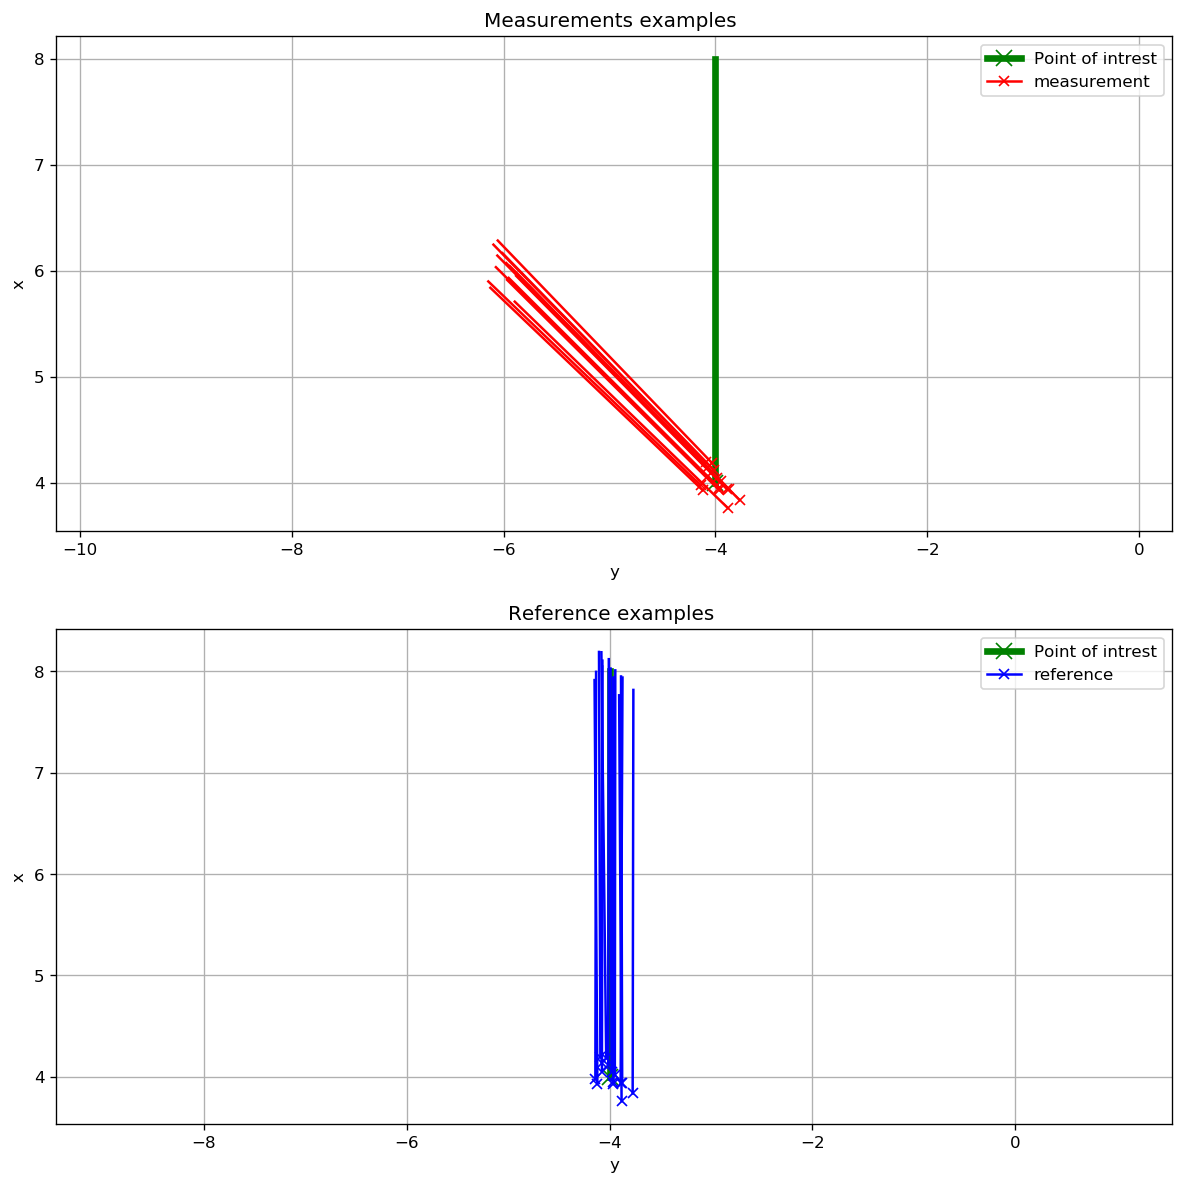

In [8]:
def plot_measurement_examples(ax, gt_polyline, sim_out, n_samples, vertex_id_of_intrest, title_str):
        
    vertex_ids = gt_polyline.signals['vertex_id'].values
    point_df = gt_polyline.interpolate_polygon(np.array([vertex_id_of_intrest]), vertex_ids, gt_polyline.signals)    
    plot_point(ax, point_df.x, point_df.y, point_df.vx, point_df.vy, 
               color='g', markersize=10, linewidth=4, label = 'Point of intrest')    
    speed = np.hypot(point_df.vx[0], point_df.vy[0])
    
    valid_df = sim_out.iloc[0:n_samples]
    for _, row in valid_df.iterrows():
        plot_detection_scs(ax, row.range, row.range_rate, row.azimuth, color='r', label='measurement')
    
    ax.set_title(title_str)
    ax.set_xlabel('y')
    ax.set_ylabel('x')
    publish_reduced_labels(ax)
    ax.axis('equal')
    ax.grid()
    
def plot_reference_examples(ax, gt_polyline, sim_out, n_samples, vertex_id_of_intrest, title_str):
        
    vertex_ids = gt_polyline.signals['vertex_id'].values
    point_df = gt_polyline.interpolate_polygon(np.array([vertex_id_of_intrest]), vertex_ids, gt_polyline.signals)    
    plot_point(ax, point_df.x, point_df.y, point_df.vx, point_df.vy, 
               color='g', markersize=10, linewidth=4, label = 'Point of intrest')    
    speed = np.hypot(point_df.vx[0], point_df.vy[0])
    
    valid_df = sim_out.iloc[0:n_samples]
    for _, row in valid_df.iterrows():
        plot_point(ax, row.x, row.y, row.vx, row.vy, color='b', label='reference')
    
    ax.set_title(title_str)
    ax.set_xlabel('y')
    ax.set_ylabel('x')
    publish_reduced_labels(ax)
    ax.axis('equal')
    ax.grid()
    

title_prefix_meas = 'Measurements examples '
title_prefix_ref= 'Reference examples '

n_samples = 15

fig2=plt.figure(figsize=(12, 12), dpi= 120, facecolor='w', edgecolor='k')
ax1 = plt.subplot(2, 1, 1)
plot_measurement_examples(ax1, deepcopy(data['gt_polyline_middle']), deepcopy(data['sim_out_middle_df']),
                          n_samples, 0.5, title_prefix_meas)

ax2 = plt.subplot(2, 1, 2)
plot_reference_examples(ax2, deepcopy(data['gt_polyline_middle']), deepcopy(data['sim_out_middle_df']),
                        n_samples, 0.5, title_prefix_ref)
    

# NEES distributions analysis

In [9]:
def visualize_distributions(df):
    chi2_dof = [2.0, 2.5, 3.0]  # 3 variables so 3 degree of freedom
    x_ref = np.linspace(0, 20, 1000)
    n_bins = 100

    plt.subplot(3, 1, 1)
    for dof in chi2_dof:
        y_ref = chi2.pdf(x_ref, dof)
        plt.plot(x_ref, y_ref, label=f'Chi-square with k = {dof:.1f}')
    df['nees_value'].hist(bins=n_bins, density=True, label='NEES from sim')
    plt.ylabel('Density [-]')
    plt.title('NEES distribution of simulated detection')
    plt.legend()

    plt.subplot(3, 1, 2)
    x_ecdf, y_ecdf = ecdf(df['nees_value'])

    for dof in chi2_dof:
        y_ref_cdf = chi2.cdf(x_ref, dof)
        plt.plot(x_ref, y_ref_cdf, label=f'Chi-square with k = {dof:.1f}')
    plt.plot(x_ecdf, y_ecdf, label='NEES from sim')
    plt.ylabel('Quantile [-]')
    plt.title('NEES cumulative distribution of simulated detection')
    plt.grid()
    plt.legend()

    plt.subplot(3, 1, 3)
    for dof in chi2_dof:
        y_ref_ecdf = chi2.cdf(x_ecdf, dof)
        ecdf_diff = y_ecdf - y_ref_ecdf
        plt.plot(x_ecdf, ecdf_diff, label=f'Chi-square with k = {dof:.1f}')
    plt.xlabel('NEES value [-]')
    plt.ylabel('CDF difference [-]')
    plt.grid()
    plt.legend()
    plt.xlim([0, 20])
    plt.title('Difference between empirical and reference cumulative distribution')


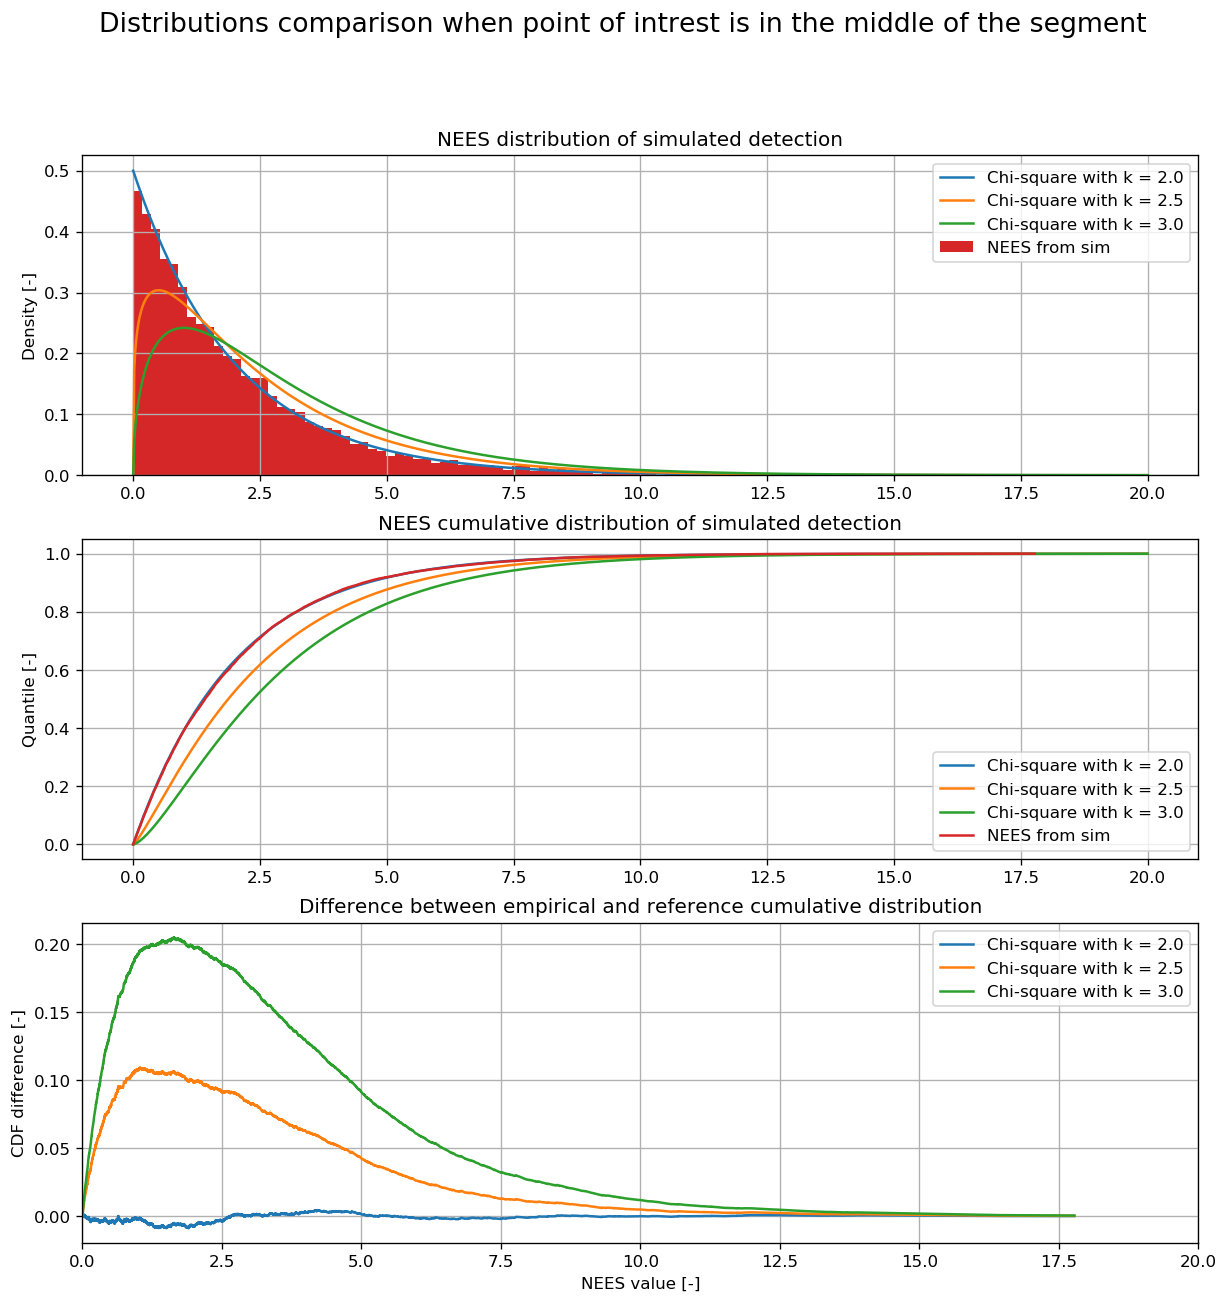

In [10]:
fig3=plt.figure(figsize=(12, 12), dpi= 120, facecolor='w', edgecolor='k')
fig3.suptitle('Distributions comparison when point of intrest is in the middle of the segment', fontsize=16)
visualize_distributions(deepcopy(data['sim_out_middle_df']))

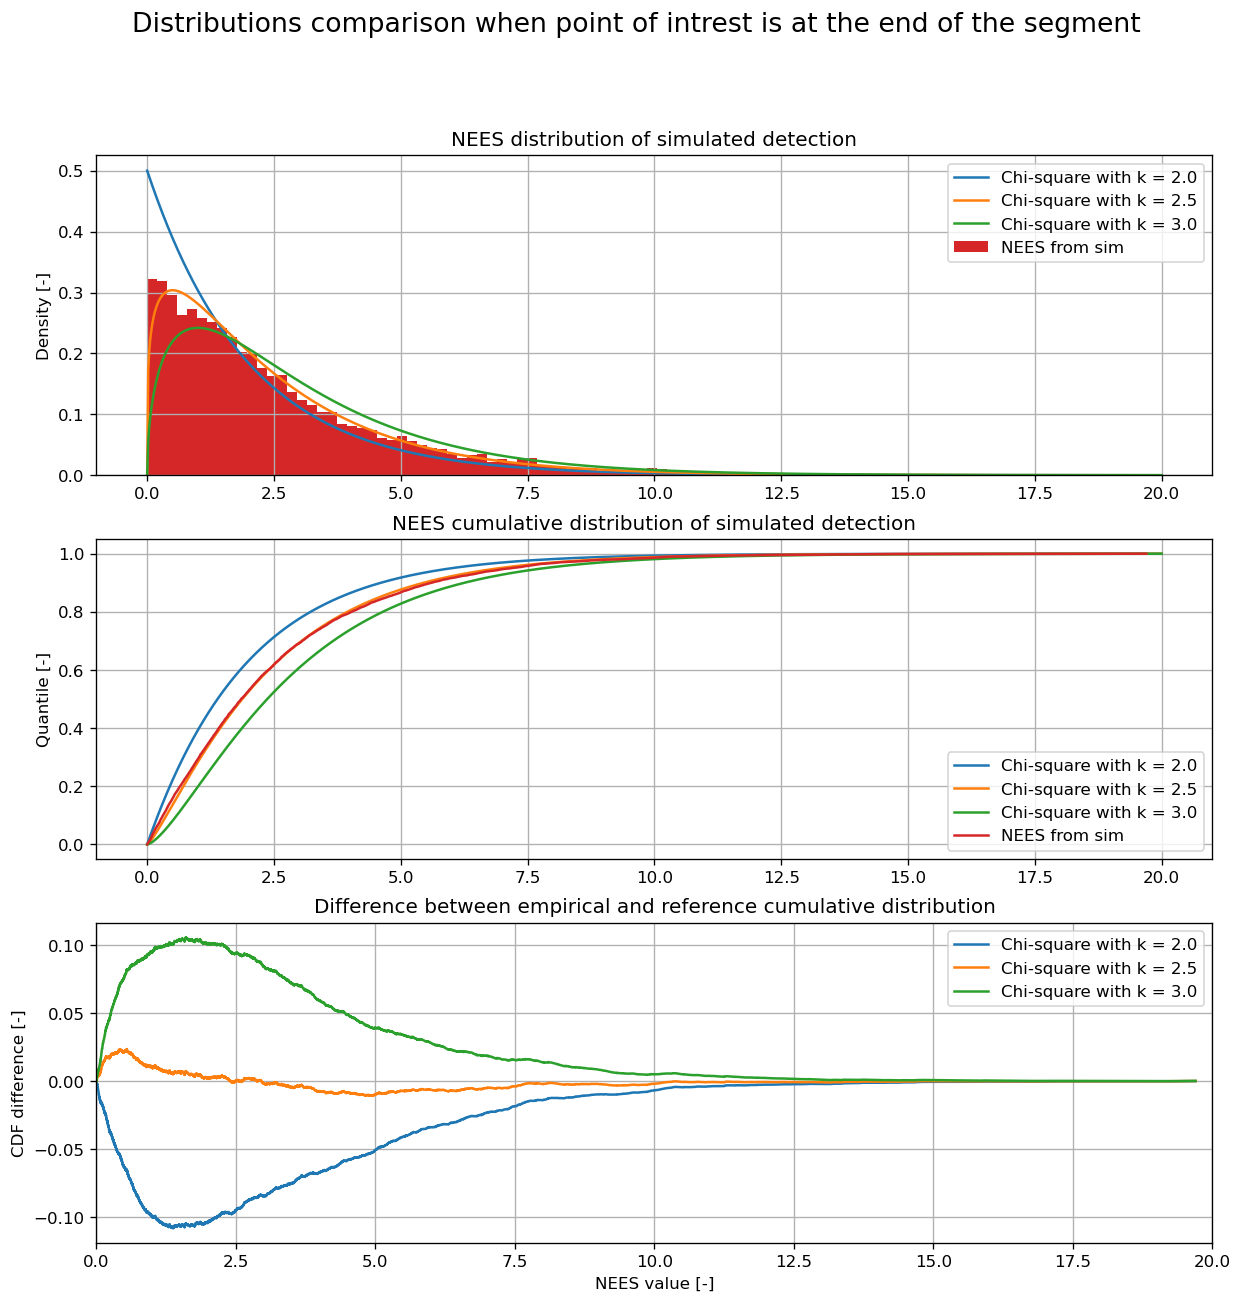

In [54]:
fig4=plt.figure(figsize=(12, 12), dpi= 120, facecolor='w', edgecolor='k')
fig4.suptitle('Distributions comparison when point of intrest is at the end of the segment', fontsize=16) 
visualize_distributions(deepcopy(data['sim_out_end_df']))

## Split based on found vertex ID

In [55]:
df = deepcopy(data['sim_out_end_df'])
corner = df.vertex_id < 0.001
corner_df = df[corner]
not_corner_df = df[np.logical_not(corner)]

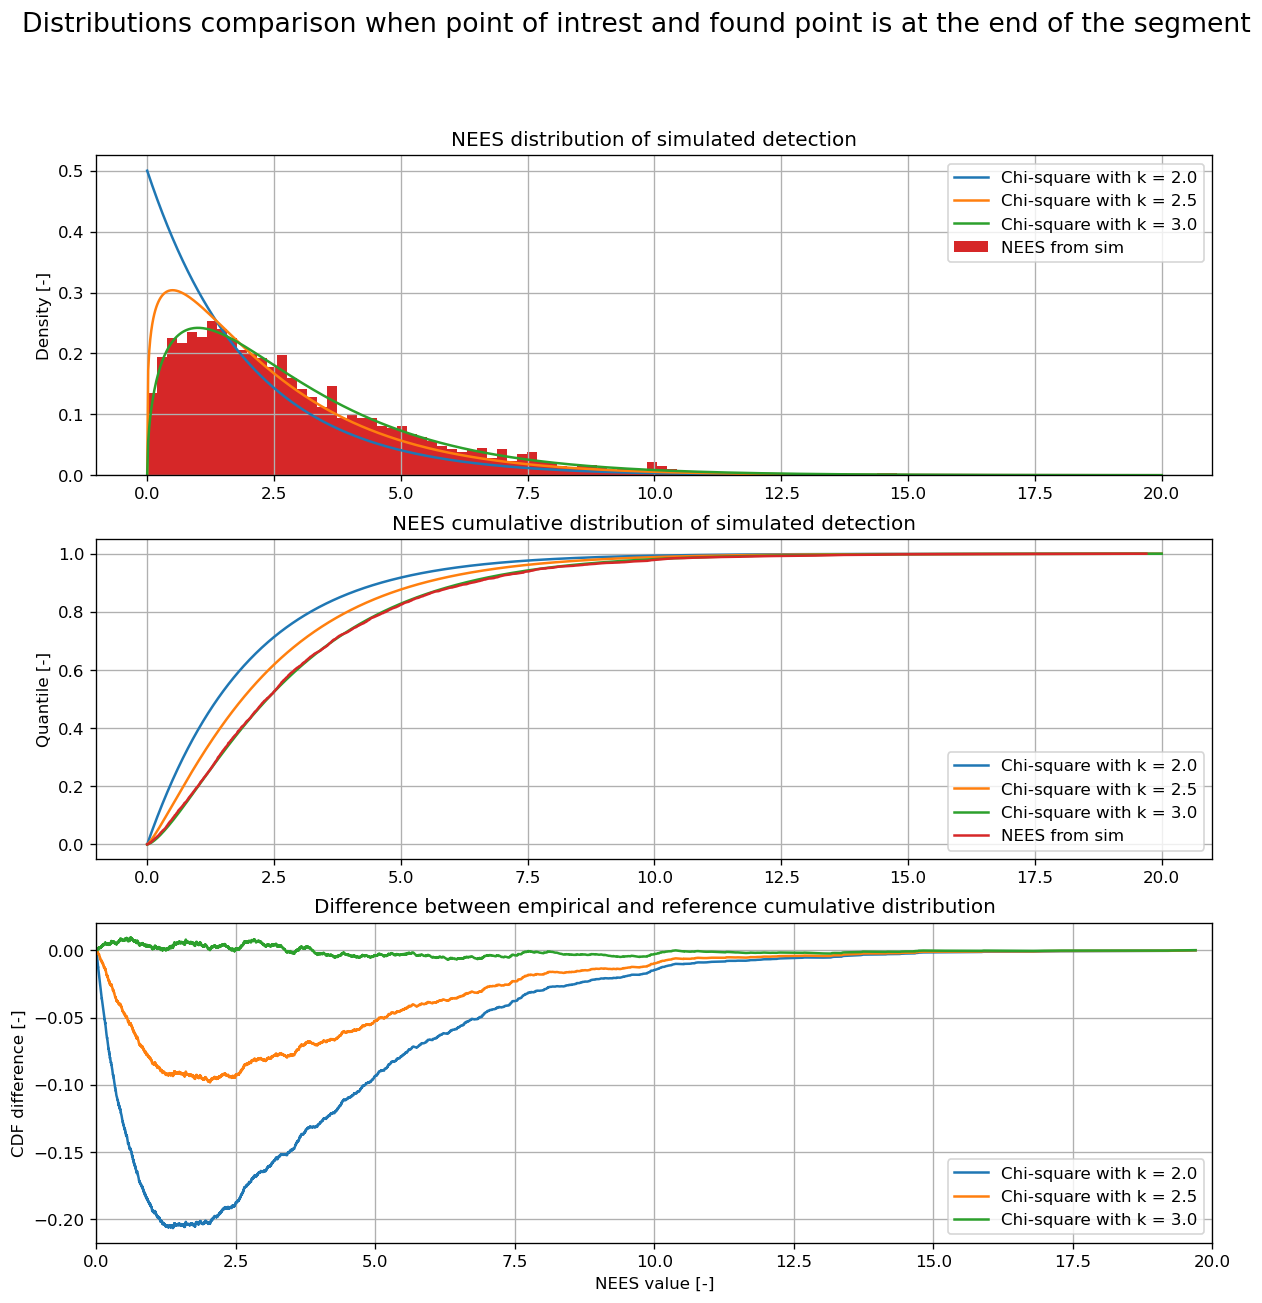

In [56]:
fig=plt.figure(figsize=(12, 12), dpi= 120, facecolor='w', edgecolor='k')
fig.suptitle('Distributions comparison when point of intrest and found point is at the end of the segment', fontsize=16) 
visualize_distributions(deepcopy(corner_df))

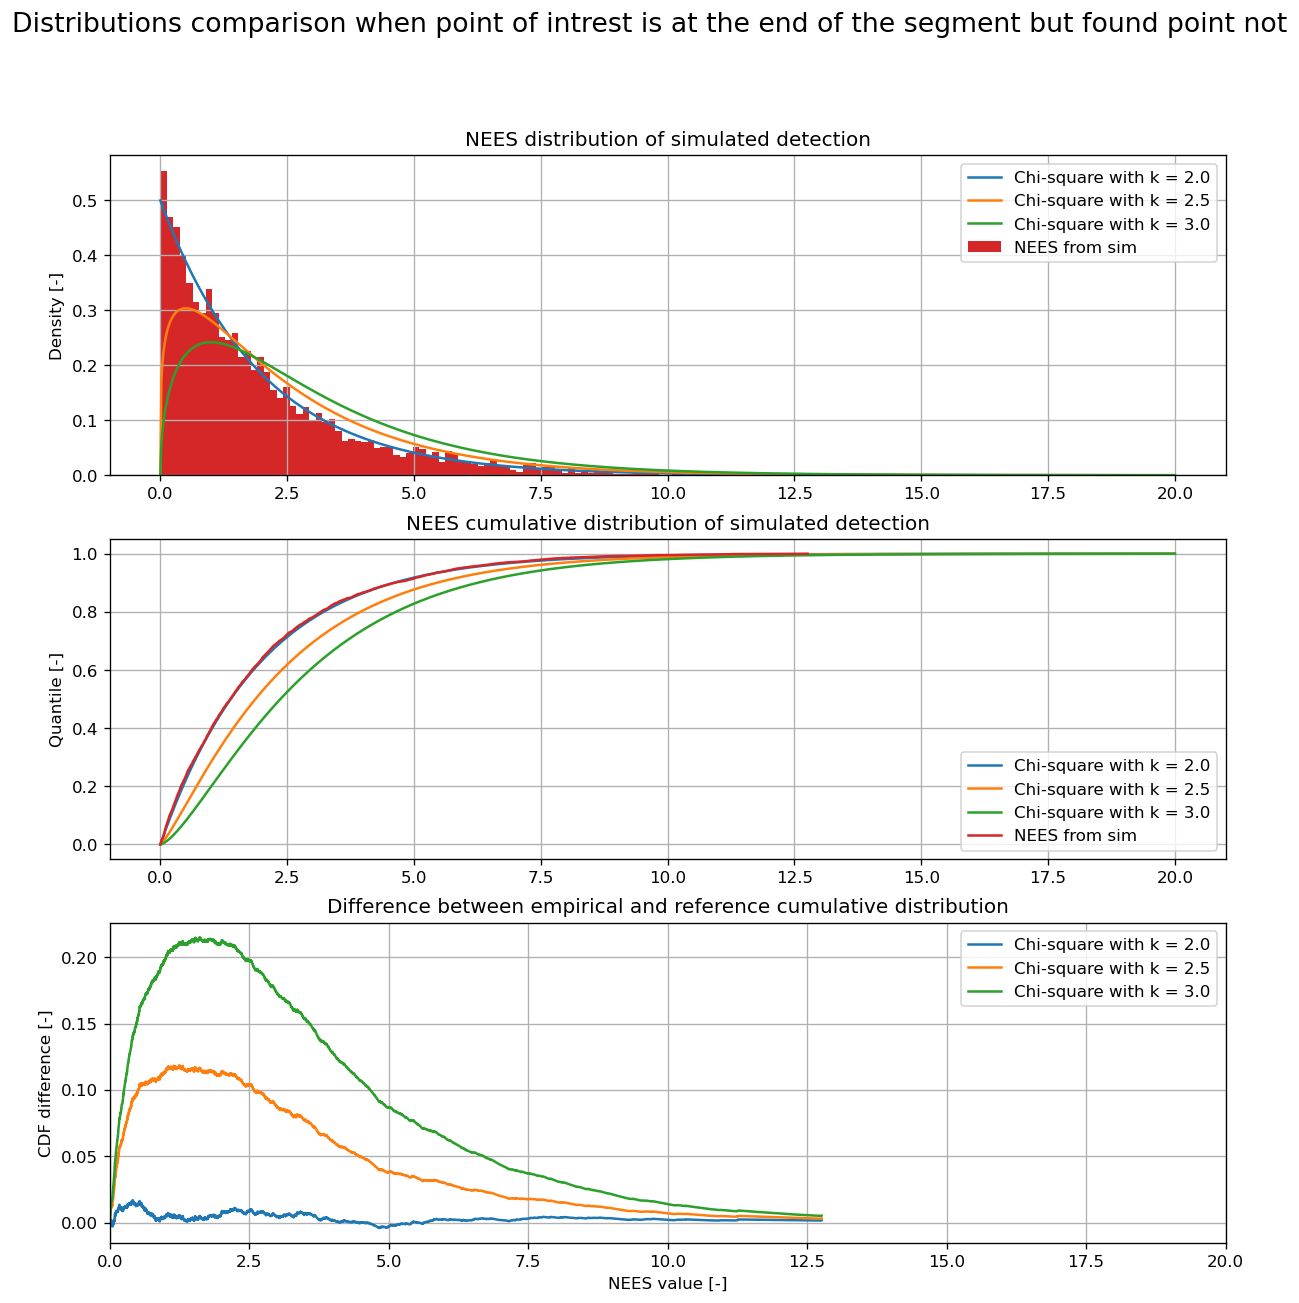

In [57]:
fig=plt.figure(figsize=(12, 12), dpi= 120, facecolor='w', edgecolor='k')
fig.suptitle('Distributions comparison when point of intrest is at the end of the segment but found point not', fontsize=16) 
visualize_distributions(deepcopy(not_corner_df))